In [1]:
import sympy
from openLoop.utilities.ipynb.displays import *
from openLoop.utilities.ipynb.ipy_sympy import *
import scipy.linalg


import numpy.testing as np_test
import declarative as decl
from declarative.bunch import (
    DeepBunch,
)

#import numpy as np

from openLoop import system
from openLoop import readouts
from openLoop import optics
from openLoop.optics.nonlinear_crystal import NonlinearCrystal
from openLoop.utilities.print import pprint

from openLoop.optics.models.KTP_test_stand import SHGTestStandResonant

asavefig.formats.jpg.use = True

Populating the interactive namespace from numpy and matplotlib
Sympy version:  1.0


In [2]:
db = DeepBunch()
db.test.mDC1.mirror_H1.T_hr = .1
db.test.ktp.length.val = np.linspace(0, .4, 30)
db.test.ktp.N_ode = 100
db.test.PSLR.power.val = .4
db.test.ktp.solution_order = 4
db.test.include_AC = False
sys = system.BGSystem(
    ctree = db,
)
sys.own.test = SHGTestStandResonant()
db = sys.ctree_shadow()
#print(sys.test.ktp.ctree_as_yaml())

In [3]:
#print(sys.test.DC_R.DC_readout)
#print(sys.test.DC_G.DC_readout)

Number of states:  4
Number of states:  4
USING DAG ALGO
DROPPED 8  MORE


KeyError: (DK{▲:test.ktp|🔌:po_Bk⥲}, DK{F⇝:+2λIR|Ψ:↓|⤱:S|𝓕:0})

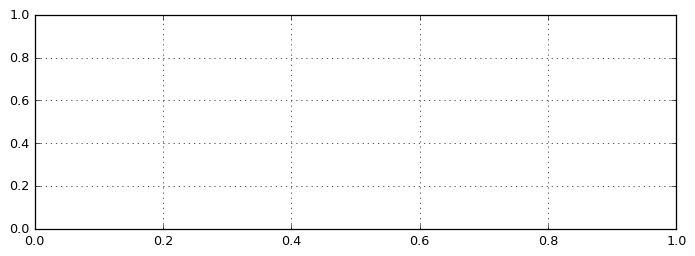

In [4]:
axB = mplfigB(Nrows=1)
test = sys.test
axB.ax0.plot(test.ktp.length_mm.val, test.DC_R.DC_readout, color = 'red')
axB.ax0.plot(test.ktp.length_mm.val, test.DC_G.DC_readout, color = 'green')
axB.ax0.plot(test.ktp.length_mm.val, test.DC_R.DC_readout + test.DC_G.DC_readout, color = 'black')
#axB.ax0.plot(test.ktp.length_mm.val, 1 * np.tanh(.200 * test.ktp.length_mm.val)**2, ls = '--', color = 'blue')
#axB.ax0.set_xscale('log')
#axB.ax0.set_ylim(0, 1.1)

In [ ]:
db = DeepBunch()
db.test.ktp.length.val = .12 * 2
db.test.ktp.N_ode = 10
db.test.mDC1.mirror_H1.T_hr = .03
db.test.mDC2.mirror_H1.L_hr = .01
db.test.PSLR.power.val = np.linspace(0, .5, 30)
db.test.ktp.solution_order = 4
db.test.include_AC = True 
sys = system.BGSystem(
    ctree = db,
    solver_name = 'scisparse'
)
sys.own.test = SHGTestStandResonant()
db = sys.ctree_shadow()
#print(sys.test.ktp.ctree_as_yaml())
print(db.test.mDC1.mirror_H1.T_hr)

In [ ]:
def plot_power_study(test):
    axB = mplfigB(Nrows=4)
    X_NLG = test.PSLR.power_W.val
    axB.ax0.plot(
        X_NLG,
        test.DC_R.DC_readout,
        color = 'red',
        label = '1064 power',
    )
    axB.ax0.plot(
        X_NLG,
        test.DC_G.DC_readout,
        color = 'green',
        label = '532 power',
    )
    axB.ax0.plot(
        X_NLG,
        test.DC_R.DC_readout + test.DC_G.DC_readout,
        color = 'black',
        label = 'total power [W]',
    )
    #axB.ax0.set_ylim(0, .5)
    axB.ax0.set_ylabel('Readout Power [W]')
    axB.ax0.legend(
        fontsize = 8,
        loc = 'center left'
    )
    axB.ax1.plot(
        X_NLG,
        100 * test.DC_G.DC_readout / test.PSLR.power_W.val,
        color = 'black',
        label = 'efficiency',
    )
    axB.ax1.plot(
        X_NLG,
        100 - 100 * (test.DC_R.DC_readout + test.DC_G.DC_readout) / test.PSLR.power_W.val,
        color = 'purple',
        label = 'loss',
    )
    axB.ax1.set_ylabel('Conversion\nEfficiency')
    axB.ax1.legend(
        fontsize = 8,
        loc = 'center left'
    )
    axB.ax2.plot(
        X_NLG,
        test.AC_R.AC_CSD_IQ[0, 0],
        color = 'red',
        label = 'amplitude quadrature',
    )
    axB.ax2.plot(
        X_NLG,
        test.AC_R.AC_CSD_IQ[1, 1],
        color = 'orange',
        label = 'phase quadrature',
    )
    axB.ax2.plot(
        X_NLG,
        test.AC_R.AC_CSD_ellipse.max,
        color = 'blue',
        label = 'ellipse max',
        ls = '--'
    )
    axB.ax2.plot(
        X_NLG,
        test.AC_R.AC_CSD_ellipse.min,
        color = 'purple',
        label = 'ellipse min',
        ls = '--',
    )
    axB.ax2.plot(
        X_NLG,
        test.AC_R.AC_CSD_ellipse.min**.25 * test.AC_R.AC_CSD_ellipse.max**.25,
        color = 'black',
        ls = '--',
        label = 'geometric mean',
    )
    axB.ax2.plot(
        X_NLG,
        test.AC_RGI.AC_CSD_ellipse.Imin,
        color = 'magenta',
        ls = '-',
        label = 'green corr min',
    )
    axB.ax2.set_ylabel('1064 PSD/ShotN\n[quanta/Hz]')
    #axB.ax2.set_yscale('log')
    axB.ax2.legend(
        fontsize = 8,
        loc = 'center left'
    )
    axB.ax3.set_ylabel('532  PSD/ShotN\n[quanta/Hz]')
    axB.ax3.plot(
        X_NLG,
        test.AC_G.AC_CSD_IQ[0, 0],
        color = 'green',
        label = 'amplitude quadrature',
    )
    axB.ax3.plot(
        X_NLG,
        test.AC_G.AC_CSD_IQ[1, 1],
        color = 'blue',
        label = 'phase quadrature',
    )
    axB.ax3.plot(
        X_NLG,
        test.AC_G.AC_CSD_ellipse.max,
        color = 'cyan',
        label = 'ellipse max',
        ls = '--',
    )
    axB.ax3.plot(
        X_NLG,
        test.AC_G.AC_CSD_ellipse.min,
        color = 'purple',
        label = 'ellipse min',
        ls = '--',
    )
    axB.ax3.plot(
        X_NLG,
        test.AC_G.AC_CSD_ellipse.min**.5 * test.AC_G.AC_CSD_ellipse.max**.5,
        color = 'black',
        label = 'geometric mean',
        ls = '--',
    )
    axB.ax3.set_xlabel('Input 1064 Power')
    axB.ax3.legend(
        fontsize = 8,
        loc = 'center left'
    )
    tkwarg = dict(
        inperc = 100 * test.mDC1.mirror_H1.T_hr,
        Lperc = 100 * test.mDC2.mirror_H1.L_hr,
        NLG = test.ktp.nlg * test.ktp.length_mm.val,
    )
    axB.ax0.set_title(
        'SHG design with {inperc}% input coupler and {Lperc}% loss (NLG {NLG} rtW/W)'.format(**tkwarg)
    )
    axB.save(
        'SHGpwr-{inperc}%IT-{Lperc}%IL-{NLG}NLG'.format(**tkwarg)
    )
    return axB
axB = plot_power_study(sys.test)

In [ ]:
def generate_study(
    T_hr = .03,
    L_hr = .01,
):
    db = DeepBunch()
    db.test.ktp.length.val = .12 * 2
    db.test.ktp.N_ode = 10
    db.test.mDC1.mirror_H1.T_hr = T_hr
    db.test.mDC2.mirror_H1.L_hr = L_hr
    db.test.PSLR.power.val = np.linspace(0, .5, 30)
    db.test.ktp.solution_order = 4
    db.test.include_AC = True 
    sys = system.BGSystem(
        ctree = db,
    )
    sys.own.test = SHGTestStandResonant()
    print("study!")
    axB = plot_power_study(sys.test)
    return axB
generate_study(
    T_hr = .1,
    L_hr = .001,
)
generate_study(
    T_hr = .1,
    L_hr = .01,
)
generate_study(
    T_hr = .1,
    L_hr = .03,
)
generate_study(
    T_hr = .03,
    L_hr = .001,
)
generate_study(
    T_hr = .03,
    L_hr = .01,
)
generate_study(
    T_hr = .03,
    L_hr = .03,
)

In [ ]:
def plot_loss_study(test, save = True):
    axB = mplfigB(Nrows=4)
    X_NLG = test.mDC2.mirror_H1.L_hr
    axB.ax0.plot(
        X_NLG,
        test.DC_R.DC_readout,
        color = 'red',
        label = '1064 power',
    )
    axB.ax0.plot(
        X_NLG,
        test.DC_G.DC_readout,
        color = 'green',
        label = '532 power',
    )
    axB.ax0.plot(
        X_NLG,
        test.DC_R.DC_readout + test.DC_G.DC_readout,
        color = 'black',
        label = 'total power [W]',
    )
    #axB.ax0.set_ylim(0, .5)
    axB.ax0.set_ylabel('Readout Power [W]')
    axB.ax0.legend(
        fontsize = 8,
        loc = 'upper right'
    )
    axB.ax1.plot(
        X_NLG,
        100 * test.DC_G.DC_readout / test.PSLR.power_W.val,
        color = 'black',
        label = 'efficiency',
    )
    axB.ax1.plot(
        X_NLG,
        100 - 100 * (test.DC_R.DC_readout + test.DC_G.DC_readout) / test.PSLR.power_W.val,
        color = 'purple',
        label = 'loss',
    )
    axB.ax1.set_ylabel('Conversion\nEfficiency')
    axB.ax1.legend(
        fontsize = 8,
        loc = 'upper right'
    )
    axB.ax2.plot(
        X_NLG,
        test.AC_R.AC_CSD_IQ[0, 0],
        color = 'red',
        label = 'amplitude quadrature',
    )
    axB.ax2.plot(
        X_NLG,
        test.AC_R.AC_CSD_IQ[1, 1],
        color = 'orange',
        label = 'phase quadrature',
    )
    axB.ax2.plot(
        X_NLG,
        test.AC_R.AC_CSD_ellipse.max,
        color = 'blue',
        label = 'ellipse max',
        ls = '--'
    )
    axB.ax2.plot(
        X_NLG,
        test.AC_R.AC_CSD_ellipse.min,
        color = 'purple',
        label = 'ellipse min',
        ls = '--',
    )
    axB.ax2.plot(
        X_NLG,
        test.AC_R.AC_CSD_ellipse.min**.25 * test.AC_R.AC_CSD_ellipse.max**.25,
        color = 'black',
        ls = '--',
        label = 'geometric mean',
    )
    axB.ax2.plot(
        X_NLG,
        test.AC_RGI.AC_CSD_ellipse.Imin,
        color = 'magenta',
        ls = '-',
        label = 'green corr min',
    )
    axB.ax2.plot(
        X_NLG,
        test.AC_RGQ.AC_CSD_ellipse.Imin,
        color = 'magenta',
        ls = '-',
        label = 'green corrQ min',
    )
    axB.ax2.set_ylabel('1064 PSD/ShotN\n[quanta/Hz]')
    #axB.ax2.set_yscale('log')
    axB.ax2.legend(
        fontsize = 8,
        loc = 'upper right'
    )
    axB.ax3.set_ylabel('532  PSD/ShotN\n[quanta/Hz]')
    axB.ax3.plot(
        X_NLG,
        test.AC_G.AC_CSD_IQ[0, 0],
        color = 'green',
        label = 'amplitude quadrature',
    )
    axB.ax3.plot(
        X_NLG,
        test.AC_G.AC_CSD_IQ[1, 1],
        color = 'blue',
        label = 'phase quadrature',
    )
    axB.ax3.plot(
        X_NLG,
        test.AC_G.AC_CSD_ellipse.max,
        color = 'cyan',
        label = 'ellipse max',
        ls = '--',
    )
    axB.ax3.plot(
        X_NLG,
        test.AC_G.AC_CSD_ellipse.min,
        color = 'purple',
        label = 'ellipse min',
        ls = '--',
    )
    axB.ax3.plot(
        X_NLG,
        test.AC_G.AC_CSD_ellipse.min**.5 * test.AC_G.AC_CSD_ellipse.max**.5,
        color = 'black',
        label = 'geometric mean',
        ls = '--',
    )
    axB.ax3.set_xlabel('Red Cavity Loss')
    axB.ax3.legend(
        fontsize = 8,
        loc = 'upper right'
    )
    tkwarg = dict(
        inperc = 100 * test.mDC1.mirror_H1.T_hr,
        mW = 1000 * test.PSLR.power_W.val,
        NLG = test.ktp.nlg * test.ktp.length_mm.val,
    )
    axB.ax0.set_title(
        'SHG design with {inperc}% input coupler {mW}mW (NLG {NLG} rtW/W)'.format(**tkwarg)
    )
    axB.ax0.set_xscale('log_zoom')
    axB.ax1.set_xscale('log_zoom')
    axB.ax2.set_xscale('log_zoom')
    axB.ax3.set_xscale('log_zoom')
    if save:
        axB.save(
            'SHGloss-{inperc}%IT-{mW}%mW-{NLG}NLG'.format(**tkwarg)
        )
    return axB

In [ ]:
from openLoop.optics.models.KTP_test_stand import SHGTestStandResonant
db = DeepBunch()
db.test.ktp.length.val = .12 * 2
db.test.ktp.N_ode = 10
db.test.mDC1.mirror_H1.T_hr = .1
db.test.mDC2.mirror_H1.L_hr = logspaced(.003, .1, 30)
db.test.PSLR.power.val = .4
db.test.ktp.solution_order = 4
db.test.include_AC = True 
sys = system.BGSystem(
    ctree = db,
)
sys.own.test = SHGTestStandResonant()
db = sys.ctree_shadow()
#print(sys.test.ktp.ctree_as_yaml())
print(db.test.mDC1.mirror_H1.T_hr)
axB = plot_loss_study(sys.test)

In [ ]:
from openLoop.optics.models.KTP_test_stand import SHGTestStandResonant
db = DeepBunch()
db.test.ktp.length.val = .12 * 2
db.test.ktp.N_ode = 10
db.test.mDC1.mirror_H1.T_hr = .03
db.test.mDC2.mirror_H1.L_hr = logspaced(.003, .1, 30)
db.test.PSLR.power.val = .4
db.test.ktp.solution_order = 4
db.test.include_AC = True 
sys = system.BGSystem(
    ctree = db,
)
sys.own.test = SHGTestStandResonant()
db = sys.ctree_shadow()
#print(sys.test.ktp.ctree_as_yaml())
print(db.test.mDC1.mirror_H1.T_hr)
axB = plot_loss_study(sys.test)

In [ ]:
from openLoop.optics.models.KTP_test_stand import SHGTestStandResonant
db = DeepBunch()
db.test.ktp.length.val = .12
db.test.ktp.N_ode = 10
db.test.mDC1.mirror_H1.T_hr = .1
db.test.mDC2.mirror_H1.L_hr = logspaced(.003, .1, 30)
db.test.PSLR.power.val = .4
db.test.ktp.solution_order = 4
db.test.include_AC = True 
db.test.mirror_gres.T_hr = .5
sys = system.BGSystem(
    ctree = db,
)
sys.own.test = SHGTestStandResonant()
db = sys.ctree_shadow()
#print(sys.test.ktp.ctree_as_yaml())
print(db.test.mDC1.mirror_H1.T_hr)
axB = plot_loss_study(sys.test, save = False)
axB.save('SHGlossResGrn-10ic-50gc-400mW')

In [ ]:
from openLoop.optics.models.KTP_test_stand import SHGTestStandResonant
db = DeepBunch()
db.test.ktp.length.val = .12 * 2
db.test.ktp.N_ode = 10
db.test.mDC1.mirror_H1.T_hr = .1
db.test.mDC2.mirror_H1.L_hr = logspaced(.003, .1, 30)
db.test.PSLR.power.val = .1
db.test.ktp.solution_order = 4
db.test.include_AC = True 
db.test.mirror_gres.T_hr = .1
sys = system.BGSystem(
    ctree = db,
)
sys.own.test = SHGTestStandResonant()
db = sys.ctree_shadow()
#print(sys.test.ktp.ctree_as_yaml())
print(db.test.mDC1.mirror_H1.T_hr)
axB = plot_loss_study(sys.test, save = False)
axB.save('SHGlossResGrn-10ic-10gc-100mW')

In [ ]:
sys.test.AC_RGQ.AC_CSD_ellipse.Imin * sys.test.AC_RGI.AC_CSD_ellipse.Imin

In [ ]:
axB = mplfigB()
for src, CSD in sys.test.AC_R.noise.CSD_by_source.items():
    if not np.all(CSD['I', 'I'] == 0):
        axB.ax0.plot(
            sys.test.mDC2.mirror_H1.L_hr, 
            np.ones_like(sys.test.mDC2.mirror_H1.L_hr) * CSD['I', 'I'].real,
            label = str(src),
        )
axB.ax0.legend(
    fontsize = 8,
)
    

In [ ]:
from openLoop.optics.models.KTP_test_stand import SHGTestStandResonant
db = DeepBunch()
db.test.ktp.length.val = .12 * 2
db.test.ktp.N_ode = 10
db.test.mDC1.mirror_H1.T_hr = .1
db.test.mDC2.mirror_H1.L_hr = .001
db.test.PSLR.power.val = .1
db.test.ktp.solution_order = 4
db.test.include_AC = True 
db.test.mirror_gres.T_hr = .1
db.test.mirror_gres.L_hr = .01
sys = system.BGSystem(
    ctree = db,
)
sys.own.test = SHGTestStandResonant()
db = sys.ctree_shadow()
#print(sys.test.ktp.ctree_as_yaml())
print(db.test.mDC1.mirror_H1.T_hr)
sys.test.full_noise_matrix()

In [ ]:
sys.test.AC_N.CSD

In [ ]:
sys.test.AC_RGI.AC_CSD_ellipse

In [ ]:
from YALL.utilities.modpack import generate_modpack
generate_modpack()

In [ ]:
10 * np.log10(.39)

In [ ]:
sys.test.AC_RGQ.AC_CSD_IQ